## Pset 5 Part I
### 
The dataset may be found in OceanFlow.zip. It consists of the ocean flow vectors for time
T = 1, 2, ..., 100. 
The flow in the dataset is an averaged measure over depth values, ranging from
the surface to either (i) near the bottom or (ii) 400m of depth, whichever is shallower.
The flow is provided as a 2-D vector field. 
The files *u.csv contain the horizontal components of the vectors,
while the files *v.csv contain the vertical components. 
The numbers in the file names indicate the corresponding time T.
For instance, files 24u.csv and 24v.csv contain pieces of information related to the flow at time T = 24.
If needed, the file mask.csv contains a a 0-1 matrix identifying land and water.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd
import os
import re

import seaborn as sns
from math import floor
from datetime import datetime
from scipy import stats
from scipy.spatial import distance


In [ ]:
#Problem 5.1
#A Visualize the average flow (i.e., averaged over all times T, but not over locations) as a 2-D vector field.
#Multiply the flow values by 25/0.9 to get a unit of cm/second (cmps)

#The time interval between any two data snapshots is 3 hours. The grid spacing used is 3 kilometers. 
#In this problem, the matrix index (0, 0) will correspond to the coordinate (0km, 0km),or the *bottom, left* of the plot

In [3]:
u = '1u.csv'
v = '1v.csv'
mask = 'mask.csv'

U1 = pd.read_csv(u, header = None).to_numpy()
V1 = pd.read_csv(v, header = None).to_numpy()
mask = pd.read_csv(mask,header=None).to_numpy()
cmps = (25/0.9)
#U1 = np.multiply(U1, cmps)
#V1= np.multiply(V1, cmps)

row = U1.shape[0]
col = U1.shape[1]

In [290]:
V1[140,115]

0.0

In [7]:
U1.shape

(504, 555)

In [4]:
#Location of both folders
path1 = r"C:\Users\kalib\Documents\IDS.131\Pset5\Data/"
#List of all text files in the folders
filelist1 = os.listdir(path1)


In [6]:
def loopfile(filelist, path):

    #Create empty array to save the sum of the u and v matrices
    All_sum_u = np.zeros((U1.shape))
    All_sum_v = np.zeros((U1.shape))
    cmps = (25/0.9)

    for filename in filelist:
        if filename.endswith("u.csv"):
        #Look first only at u files
            T1_u = pd.read_csv(f'{path}/{filename}', header =None).to_numpy()
            #Convert each Time matrix to cm/s
            T1_u = np.multiply(T1_u, cmps)
            #Save the sum for that file in the array
            All_sum_u = np.add(All_sum_u, T1_u)
        elif filename.endswith("v.csv"):
        #Look first only at u files
            T1_v = pd.read_csv(f'{path}/{filename}', header =None).to_numpy()
            #Convert each Time matrix to cm/s
            T1_v = np.multiply(T1_v, cmps)
            #Save the sum for that file in the array
            All_sum_v = np.add(All_sum_v, T1_v)   
        
    return All_sum_u, All_sum_v

In [7]:
#Find sum from files in path 1
#time_start = time.time()

All_sum_u, All_sum_v = loopfile(filelist1, path1)

Avg_u = All_sum_u/100
Avg_v = All_sum_v/100

#print('Time elapsed {}'.format(time.time()-time_start))


In [8]:
print('Maximum avg U flow is ', np.max(Avg_u))
print('Maximum avg V flow is ', np.max(Avg_v))

Maximum avg U flow is  51.80300500000002
Maximum avg V flow is  43.4080388888889


In [9]:
SumOfVectors = np.add(Avg_u**2, Avg_v**2)

In [10]:
#Calculating speed from U(Horizontal) and V (vertical) vector components
Speed = np.sqrt(SumOfVectors)
Speed.shape
#Speed_re = Speed[::10,:][:,::10] 

(504, 555)

In [37]:
u_land = np.multiply(Avg_u, mask)
v_land = np.multiply(Avg_v, mask)

speed_land = np.multiply(Speed, mask)


In [11]:
#Grid of coordinates for Full data set points
X,Y = np.meshgrid(np.arange(0, col), np.arange(0, row))
#X_km,Y_km = np.meshgrid(np.arange(0, (col)*3,3), np.arange(0, (row)*3,3))

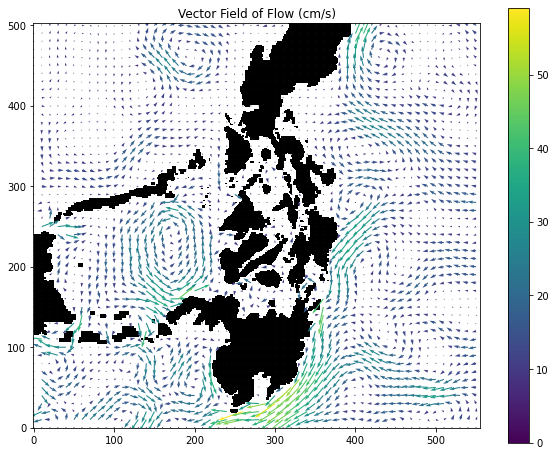

In [83]:
fig1, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_title('Vector Field of Flow (cm/s)')
#matplotlib.pyplot.quiver(x_coordinate, y_coordinate, x_direction, y_direction)
#Resample to plot only every 10 vector points
color = Speed[::10,:][:,::10]
colorflip = np.flip(color,0)
Q = ax1.quiver(X[::10,:][:,::10] , Y[::10,:][:,::10] , (Avg_u[::10,:][:,::10]) , (Avg_v[::10,:][:,::10]), color)
#Q = ax1.quiver(X[::10,:][:,::10] , Y[::10,:][:,::10], np.flip(Avg_u[::10,:][:,::10],0) , np.flip(Avg_v[::10,:][:,::10],0), colorflip )

#strm = ax1.streamplot(x,y, np.flip(u, 0), np.flip(v, 0), density=1.8, linewidth=0.8, maxlength=0.5)
ph = ax1.imshow(np.flip(mask,0), cmap = 'gray', origin='upper', interpolation='nearest')

#ax1.set_xlabel('km')
#ax1.set_ylabel('km')
ax1.invert_yaxis()
fig1.colorbar(Q)
plt.show()

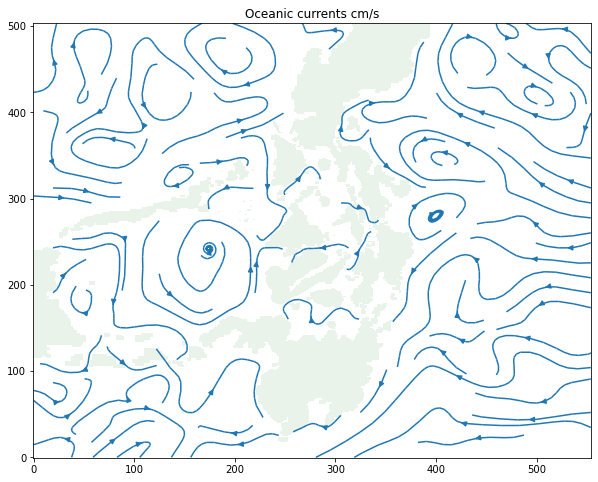

In [85]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.set_title('Oceanic currents cm/s')

#matplotlib.pyplot.quiver(x_coordinate, y_coordinate, x_direction, y_direction)
#Sflip = ax1.streamplot(X, Y, Avg_u, np.flip(Avg_v,0), density=3)

S = ax1.streamplot(X, Y, Avg_u, Avg_v, density=1)
ph = ax1.imshow(np.flip(mask,0), origin='upper', alpha=0.09, interpolation='nearest',  aspect='auto', cmap ='ocean')

#ax1.imshow(np.flip(mask,0), cmap = 'gray', origin='upper', interpolation='nearest')
ax1.invert_yaxis()
plt.show()

In [ ]:
#ax1.set_title('Oceanic currents cm/s')
#fig1, ax1 = plt.subplots(figsize=(10, 8))

#matplotlib.pyplot.quiver(x_coordinate, y_coordinate, x_direction, y_direction)
#S = ax1.streamplot(X, Y, u_land, v_land)
#ph = ax1.imshow(mask, cmap = 'gray', origin='upper', interpolation='nearest')
#ax1.invert_yaxis()
#plt.show()

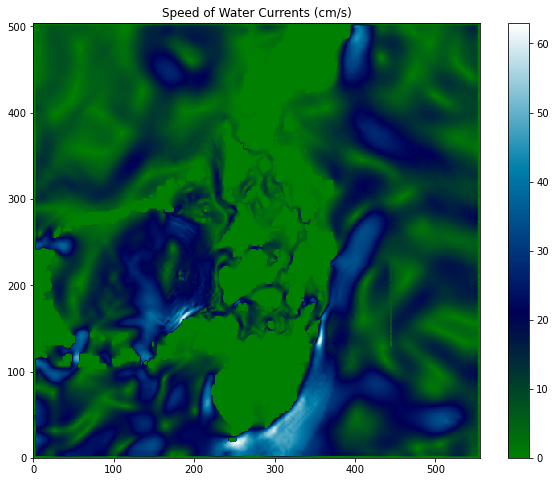

In [19]:

fig, ax = plt.subplots(figsize=(10,8))
im = ax.pcolor(Speed, cmap='ocean')
#ax1.imshow(np.flip(mask,0), origin='upper', alpha=0.09, interpolation='nearest',  aspect='auto', cmap ='gray')
plt.title('Speed of Water Currents (cm/s)')
fig.colorbar(im)
plt.show()

In [64]:
#Plot of speed matrix after multiplying by the mask to remove vector intersection with land
#fig, ax = plt.subplots()
#im = ax.pcolor(Speed, cmap='ocean')

#plt.title('Speed of Water Currents (cm/s)')
#ph = ax.imshow(mask, cmap = 'gray', origin='upper', interpolation='nearest')
#ax.invert_yaxis()

#fig.colorbar(im)
#plt.show()

In [ ]:
#Part 1 C
#Find speed at all points for all times
#What is the correlation between speed at point A and speed at each point x,y 
#graphed as a function of distance between point A and point x,y
#Considering two points: (140, 115) and (400, 400). 
#For each of these two points, plot the average correlation of ocean flow (choose either the speed
#measure or both the horizontal and vertical flows) with other points as a function of grid distance/L1-distance 
#(considering only points with distance < 100).

In [196]:
U1.shape

(504, 555)

In [232]:
W = np.empty(U1.shape)
W.shape

(504, 555)

In [5]:

def Speed(U1, V1, path):
    #Function to calculate the speeds at each point i,j for times T
    #Initial load of file T1
    cmps = (25/0.9)
    U1= np.multiply(U1,cmps)
    V1 = np.multiply(V1,cmps)
    #Initialize array of speed values for each Time segment t using T1 files
    speed_array = np.sqrt(U1**2+V1**2)
        
    
    for i in range(2,101):
        
        #Look at files u and v for T=2 to T=100
        u_file = path + str(i)+"u.csv"
        v_file = path + str(i)+"v.csv"
        #Load files
        u = np.loadtxt(open(u_file,"rb"), delimiter=",")
        v = np.loadtxt(open(v_file,"rb"), delimiter=",")
        #Converting the velocity to cm/s
        u= np.multiply(u,cmps)
        v = np.multiply(v,cmps)
        #Create array of speed values for each Time segment t
        speed_i = np.sqrt(u**2+v**2)
        
        speed_array = np.dstack((speed_array,speed_i))
    
        
        
    return speed_array

In [6]:
speed_array = Speed(U1, V1, path1)

In [8]:
speed_array.shape

(504, 555, 100)

In [338]:
sum(speed_array[140,115, : ])

0.0

In [284]:
speed_array[115,140,:]

array([2.71227004e+04, 5.76568402e+00, 5.48031212e+01, 1.22727248e+02,
       9.47849257e+01, 3.02610159e+00, 1.61806402e+01, 5.76628145e+01,
       6.41048768e+01, 1.38505614e+01, 2.47837539e+01, 1.20330693e+02,
       1.40470604e+02, 3.41500083e+01, 4.57929809e+01, 1.44161449e+01,
       7.13331129e+01, 1.02573281e+01, 2.06331521e+01, 9.62649780e+01,
       1.55920720e+02, 4.86836706e+01, 6.73627472e+01, 1.09182031e+01,
       8.03052118e+01, 3.41530951e+01, 4.48081639e+01, 5.80585539e+01,
       1.67740016e+02, 7.61091523e+01, 7.52040661e+01, 3.09702675e+01,
       8.74192690e+01, 5.40493368e+01, 5.32107029e+01, 1.42552189e+01,
       1.63808627e+02, 9.92895290e+01, 7.12933391e+01, 4.88683041e+01,
       7.87695773e+01, 7.83372395e+01, 3.52532778e+01, 1.51392805e+01,
       1.47883542e+02, 1.19475114e+02, 4.85713426e+01, 8.04324807e+01,
       5.32721054e+01, 8.03822012e+01, 4.47425519e+01, 6.15421337e+01,
       1.04628336e+02, 1.31793516e+02, 1.52226135e+01, 7.18714782e+01,
      

In [9]:
#Function to calculate L1 distance
#Reference: https://www.geeksforgeeks.org/python-calculate-city-block-distance/
def cityblock_distance(A, B):
  
    result = np.sum([abs(a - b) for (a, b) in zip(A, B)])
    return result

In [10]:
def distance(array, x, y):
    #Input array is array of speeds at one time T, just to get a grid of coord.
    #Input x and y are the coordinates for the point we are interested in
    #Distance is calculated using L1 distance, 
    #Will save to an array coordinates and distances
    #And then identify an array of those coordinates whose distance is less than 100 (i.e. very close to the x,y coordinate)
    distance = []
    x_coord = []
    y_coord = []
    #Iterate through every row and column of the array
    row = np.arange(0,array.shape[0]+1)
    col = np.arange(0, array.shape[1]+1)

    for i in col:
        for j in row:
            #Calculate L1 distance
            dist = cityblock_distance([i,j], [x,y])
            #Save distances to a list
            distance.append(dist)
            #Save coordinates to a list
            x_coord.append(i)
            y_coord.append(j)
    #Save the lists from the for loop to a dataframe        
    df = pd.DataFrame()
    df['x'] = x_coord
    df['y'] = y_coord
    df['Distance'] = distance
    #Filter the dataframe to save only those distances less than 100
    df_closedistance = df[df['Distance'] < 100]
            
    return df_closedistance

In [24]:
close_distance = distance(U1, 115, 140)
close_distance.head()

x    y  Distance
8220  16  140        99
8724  17  139        99
8725  17  140        98
8726  17  141        99
9228  18  138        99

In [25]:
close_distance.shape

(19801, 3)

In [12]:
close_distance2 = distance(U1, 400, 400)

In [26]:
close_distance2.head()

x    y  Distance
152405  301  400        99
152909  302  399        99
152910  302  400        98
152911  302  401        99
153413  303  398        99

In [251]:
i = close_distance.iloc[1, 0]
type(i)

numpy.int64

In [13]:
def CorrCoeff(speed_array, x, y, close_distance):
    #Inputs are the 3D array of the speeds; row/col of the coordinate of interest; dataframe of col/row and distance
    #Below calculates the Pearson coeff between the speeds for coordinate x,y and all other coordinates
    a = speed_array[y,x,:]
    #a = speed_array[x,y,:] #Access column of speed values located at the x,y coordinates of interest
    Correlation = [] #Initiate an array to save correlation values
    Dis = [] #Initiate an array to save the distances between the x,y of interest and all other coordinates (D<100)
    for row in range(len(close_distance)):
        #Retrieves row value saved in Distance dataframe
        i = close_distance.iloc[row, 0]
        #Retrieves col value saved in Distance dataframe
        j = close_distance.iloc[row, 1]
        #Retrieves distance value saved in Distance dataframe
        distance = close_distance.iloc[row, 2]
        #Retrieves speed value from 3D array of all speeds
        b = speed_array[j,i,:]
        #If all values in B are zero then do not compute Pearson Corr Coeff. This point is a land coordinate
        if not b.any():
            continue
        else:
         #Looks at each column and only calculates correlation for those where there are no zero values
            PC = stats.pearsonr(a, b)
            #Saves the correlation value to a list
            Correlation.append(PC[0])
            #Saves the distance value to a list
            Dis.append(distance)
    #Saves both distance and correlation lists to a dataframe
    df = pd.DataFrame()
    df['D'] = Dis
    df['Corr'] = Correlation
    return df #Returns the dataframe
    

In [320]:
A.any()

True

In [317]:
A =speed_array[400,400,:]

In [318]:
B =speed_array[115,140,:]

In [319]:
stats.pearsonr(A, B)

(0.9998897203907482, 5.455419555948847e-181)

In [14]:
#consider points: (140, 115)
Corr = CorrCoeff(speed_array, 140, 115, close_distance)

In [18]:
Corr_final = Corr[['D','Corr']].groupby(['D']).mean()
Corr_final.head()

Corr
D          
1  0.833664
2  0.831443
3  0.833750
4  0.822956
5  0.729625

In [20]:
#consider point (400, 400).
Corr2 = CorrCoeff(speed_array, 400, 400, close_distance2)



In [21]:
Corr2_final = Corr2[['D','Corr']].groupby(['D']).mean()
Corr2_final.head()

Corr
D          
0  1.000000
1  0.999275
2  0.997812
3  0.995258
4  0.991469

Text(0, 0.5, 'Pearson Correlation Coeff')

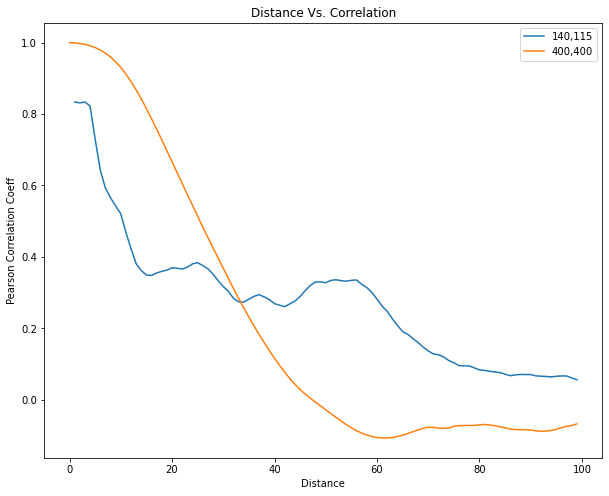

In [23]:
fig1, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_title('Distance Vs. Correlation')
plt.plot(Corr_final, label='140,115')
plt.plot(Corr2_final, label='400,400')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Pearson Correlation Coeff')

Text(0, 0.5, 'Pearson Correlation Coeff')

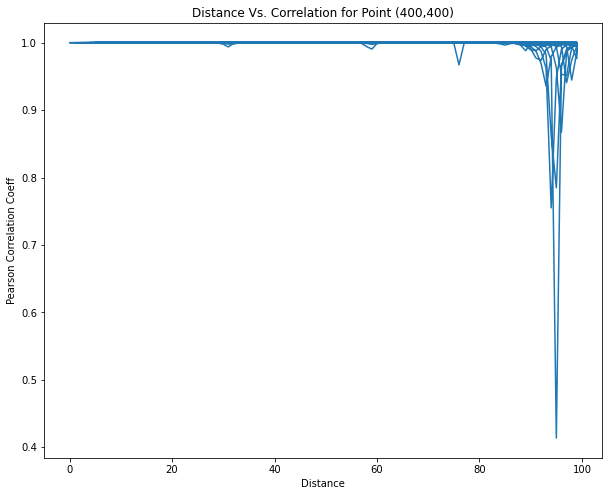

In [345]:
fig1, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_title('Distance Vs. Correlation for Point (400,400)')
plt.plot(Corr2['D'],Corr2['Corr'])
plt.xlabel('Distance')
plt.ylabel('Pearson Correlation Coeff')

In [15]:
def update_position(x,y,u,v):
    #x and y should be in km
    
    #Flow is in units km/h (Converted in function below)
    #time interval between any two data snapshots is 3 hours
    T =100 #Number of time stamps
    dt = 3 #Hours between time intervals
    i = int(np.floor(x/3))
    j = int(np.floor(y/3))
    u_x = u[i,j]
    v_y = v[i,j]
    #Converting position from index location to cm location
    #Multiplying by change in time dt and the flow vector at that position and time stamp
    x_new = (x) + dt*(u_x)
    y_new = (y) + dt*(v_y)
 
    
    return x_new, y_new

In [32]:
update_position(300, 1050, U1, V1)

(298.2894, 1046.4525)

In [62]:
def TimeStamp(x,y):
    #Function to track changing position of the object over time
    x_pos = []
    y_pos = []
    time = 0
    T =100 #Number of time stamps
    dt = 3 #Hours between time intervals
    for i in range(T):
        x_pos.append(x)
        y_pos.append(y)
        #Time (hours)
        time = (i + 1)*dt
        
        path = r"C:\Users\kalib\Documents\IDS.131\Pset5\Data/"
        u_file = path + str(i+1)+"u.csv"
        v_file = path +str(i+1)+"v.csv"
        
        u = np.loadtxt(open(u_file,"rb"), delimiter=",")
        v = np.loadtxt(open(v_file,"rb"), delimiter=",")
        
        #Converting the velocity to cm/s
        cmps = (25/0.9)
        u= np.multiply(u,cmps)
        v = np.multiply(v,cmps)
        #Converting the velocity then to km/h
        kmh = (3600/1e5)
        u= np.multiply(u,kmh)
        v = np.multiply(v,kmh)
        
        x, y  = update_position(x,y,u,v)
        
    return x_pos, y_pos, time

In [39]:
x_pos, y_pos, time = TimeStamp(350, 100)


In [16]:
#l = 10
#x_list = np.random.uniform(low=0, high=row*3, size=(l,))
#y_list = np.random.uniform(low=0, high=col*3, size=(l,))
x_list = (300, 600, 900, 900, 450)
y_list = (300, 600, 900, 30, 1350)

df = pd.DataFrame()

for i in range(len(x_list)):
    x0 = x_list[i]
    y0 = y_list[i]
    
    x_pos, y_pos, time = TimeStamp(x0, y0)
    
    xname = 'x pos'+str(i)
    yname = 'y pos'+str(i)
    
    df[xname] = x_pos
    df[yname] = y_pos

print(df.head())

      x pos0      y pos0      x pos1     y pos1      x pos2      y pos2  \
0  300.00000  300.000000  600.000000  600.00000  900.000000  900.000000   
1  301.41723  300.702540  600.289233  602.38311  899.730261  899.661690   
2  302.91018  301.441380  600.660723  604.78929  899.480862  899.634667   
3  304.82862  301.377327  601.254063  607.56474  899.235882  899.635481   
4  307.53423  299.678847  602.190603  610.30950  899.108184  899.785853   

      x pos3     y pos3     x pos4      y pos4  
0  900.00000  30.000000  450.00000  1350.00000  
1  901.17165  30.101124  448.84941  1348.24296  
2  902.45913  30.185466  447.41412  1346.36340  
3  903.73614  30.274578  445.85952  1344.55662  
4  905.17659  30.453258  444.28617  1342.80936  


In [17]:

fig1, ax1 = plt.subplots(figsize=(20, 20))
ph = ax1.imshow(np.flip(mask,0), cmap ='ocean')
S = ax1.streamplot(X, Y, Avg_u, Avg_v, density=5)

ax1.invert_yaxis()

df_km = df/3
num = int(df.shape[1]/2)
for i in range(num):
    x_col = 'x pos'+str(i)
    y_col = 'y pos'+str(i)
    plt.plot(df_km[x_col], df_km[y_col],'--', label='line with marker',linewidth=5)


AttributeError: 'int' object has no attribute 'time'

In [47]:
#plt.plot(x,y, '--bo', label='line with marker')

In [48]:
#fig1, ax1 = plt.subplots(figsize=(10, 8))
#ph = ax1.imshow(np.flip(mask,0), origin='upper', alpha=0.09, interpolation='nearest',  aspect='auto', cmap ='ocean')
#ax1.invert_yaxis()

#pt = ax1.plot(x, y)

In [12]:
def path_df(x_list, y_list):

    df = pd.DataFrame()

    for i in range(len(x_list)):
        x0 = x_list[i]
        y0 = y_list[i]

        x_pos, y_pos, time = TimeStamp(x0, y0)

        xname = 'x pos'+str(i)
        yname = 'y pos'+str(i)

        df[xname] = x_pos
        df[yname] = y_pos

    return df

In [97]:
var #0,25,50,75,100

array([  0,  25,  50,  75, 100])

In [110]:
#var = np.arange(start=0,stop=125,step=25 )
#i = 0
#cov = np.multiply(var[i],np.identity(2))
#size = 10
#mean = (300, 1050) #km mean
#Sample for x,y coordinate locations from a gaussian distribution with given mean and covariance
#x_sample, y_sample = np.random.multivariate_normal(mean, cov, size).T
#Using those sampled locations map their progress from time T=1 to T=40 (i.e. 120 hours) time stamp
#df_1 = path_df(x_sample,y_sample)



In [72]:
start_time = datetime.now()

var = np.arange(start=0,stop=125,step=25 )

dict_of_df = {} # initialize empty dictionary

for i in range(len(var)):
    dict_of_df["df_{}".format(i)] =loopvariance(var)
    
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:31:07.731230


In [64]:
#mean = (1200, 300)
#size = 10
#cov = np.multiply(10,np.identity(2))
#x_sample, y_sample = np.random.multivariate_normal(mean, cov, size).T
#df_name = path_df(x_sample,y_sample)

In [61]:
def loopvariance(var):
    mean = (1200, 300)
    size = 10
    cov = np.multiply(var[i],np.identity(2))
    x_sample, y_sample = np.random.multivariate_normal(mean, cov, size).T
    df_name = path_df(x_sample,y_sample)
    return df_name

In [59]:
df_1 #Variance is 0 at var[i=0]
df_2 #Variance is 25
df_3 #Variance is 50
df_4 #Variance is 75
df_5 #Variance is 100 at var[i=4]

'DF0'

In [137]:
#At time t =120 hours x coordinates
Var_0_time120_x = df_1.iloc[39,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_25_time120_x = df_2.iloc[39,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_50_time120_x = df_3.iloc[39,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_75_time120_x = df_4.iloc[39,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_100_time120_x = df_5.iloc[39,[0,2,4,6,8,10,12,14,16,18]].mean()



In [149]:
print(Var_0_time120_x, Var_25_time120_x, Var_50_time120_x, Var_75_time120_x, Var_100_time120_x)


279.792468 280.8991958191755 275.7837658921412 277.3190619758878 284.55656827089865


In [145]:
#At time t =48 hours x coordinates
Var_0_time48_x = df_1.iloc[15,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_25_time48_x = df_2.iloc[15,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_50_time48_x = df_3.iloc[15,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_75_time48_x = df_4.iloc[15,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_100_time48_x = df_5.iloc[15,[0,2,4,6,8,10,12,14,16,18]].mean()
print(Var_0_time48_x, Var_25_time48_x, Var_50_time48_x, Var_75_time48_x, Var_100_time48_x)


281.65506 283.67096931917547 278.8771115521413 279.7710693758878 288.7161176058986


In [146]:
#At time t = 72 hours x coordinates
Var_0_time72_x = df_1.iloc[23,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_25_time72_x = df_2.iloc[23,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_50_time72_x = df_3.iloc[23,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_75_time72_x = df_4.iloc[23,[0,2,4,6,8,10,12,14,16,18]].mean()
Var_100_time72_x = df_5.iloc[23,[0,2,4,6,8,10,12,14,16,18]].mean()
print(Var_0_time72_x, Var_25_time72_x, Var_50_time72_x, Var_75_time72_x, Var_100_time72_x)


279.792468 281.2442285191754 276.1363217521412 277.5639489758878 285.1758233058987


In [144]:
#At time t =120 hours y coordinates

Var_0_time120_y = df_1.iloc[39,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_25_time120_y = df_2.iloc[39,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_50_time120_y = df_3.iloc[39,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_75_time120_y = df_4.iloc[39,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_100_time120_y = df_5.iloc[39,[1,3,5,7,9,11,13,15,17,19]].mean()
print(Var_0_time120_y, Var_25_time120_y, Var_50_time120_y, Var_75_time120_y, Var_100_time120_y)

1004.5281000000001 1004.1124084914338 1001.2459801988256 1003.2838315515194 1002.3596463321426


In [147]:
#At time t = 48 hours y coordinates

Var_0_time48_y = df_1.iloc[15,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_25_time48_y = df_2.iloc[15,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_50_time48_y = df_3.iloc[15,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_75_time48_y = df_4.iloc[15,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_100_time48_y = df_5.iloc[15,[1,3,5,7,9,11,13,15,17,19]].mean()
print(Var_0_time48_y, Var_25_time48_y, Var_50_time48_y, Var_75_time48_y, Var_100_time48_y)

1009.6287 1010.5159603914339 1009.5196075988257 1009.0292674515194 1012.1369088321426


In [148]:
#At time t =72 hours y coordinates

Var_0_time72_y = df_1.iloc[23,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_25_time72_y = df_2.iloc[23,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_50_time72_y = df_3.iloc[23,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_75_time72_y = df_4.iloc[23,[1,3,5,7,9,11,13,15,17,19]].mean()
Var_100_time72_y = df_5.iloc[23,[1,3,5,7,9,11,13,15,17,19]].mean()
print(Var_0_time72_y, Var_25_time72_y, Var_50_time72_y, Var_75_time72_y, Var_100_time72_y)

1004.5281000000001 1004.6973313914339 1002.3936025988256 1003.5947734515194 1003.9354674321427


In [ ]:
#for i in range(len(df_1.shape[0])):

 #       xname = 'x pos'+str(i)
  #      yname = 'y pos'+str(i)

   #     df[xname] = x_pos
    #    df[yname] = y_pos

In [105]:
Time_120hours_var1 = df_1.iloc[39,:]
Time_120hours_var2 = df_2.iloc[39,:]
Time_120hours_var3 = df_3.iloc[39,:]
Time_120hours_var4 = df_4.iloc[39,:]
Time_120hours_var5 = df_5.iloc[39,:]


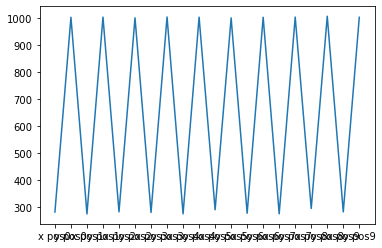

In [106]:
plt.plot(Time_120hours_var2)

In [147]:
#x_sample, y_sample = np.random.multivariate_normal(mean, cov, size).T
#print(x_sample)
#print(y_sample)

In [153]:
#gaussian_path = path_df(x_sample,y_sample)
#gaussian_path.head()

In [71]:
dict_of_df.keys()

dict_keys([])

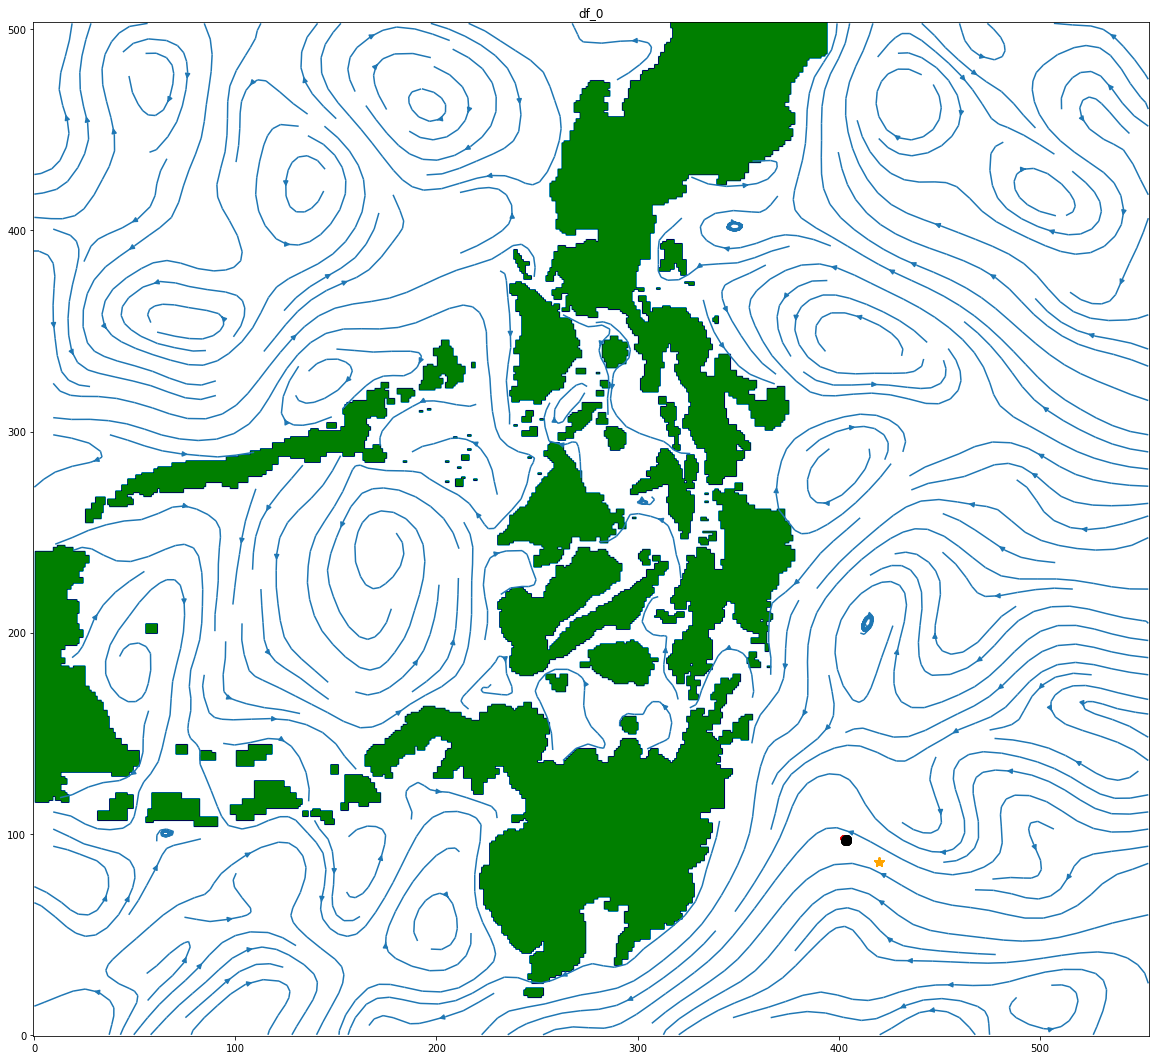

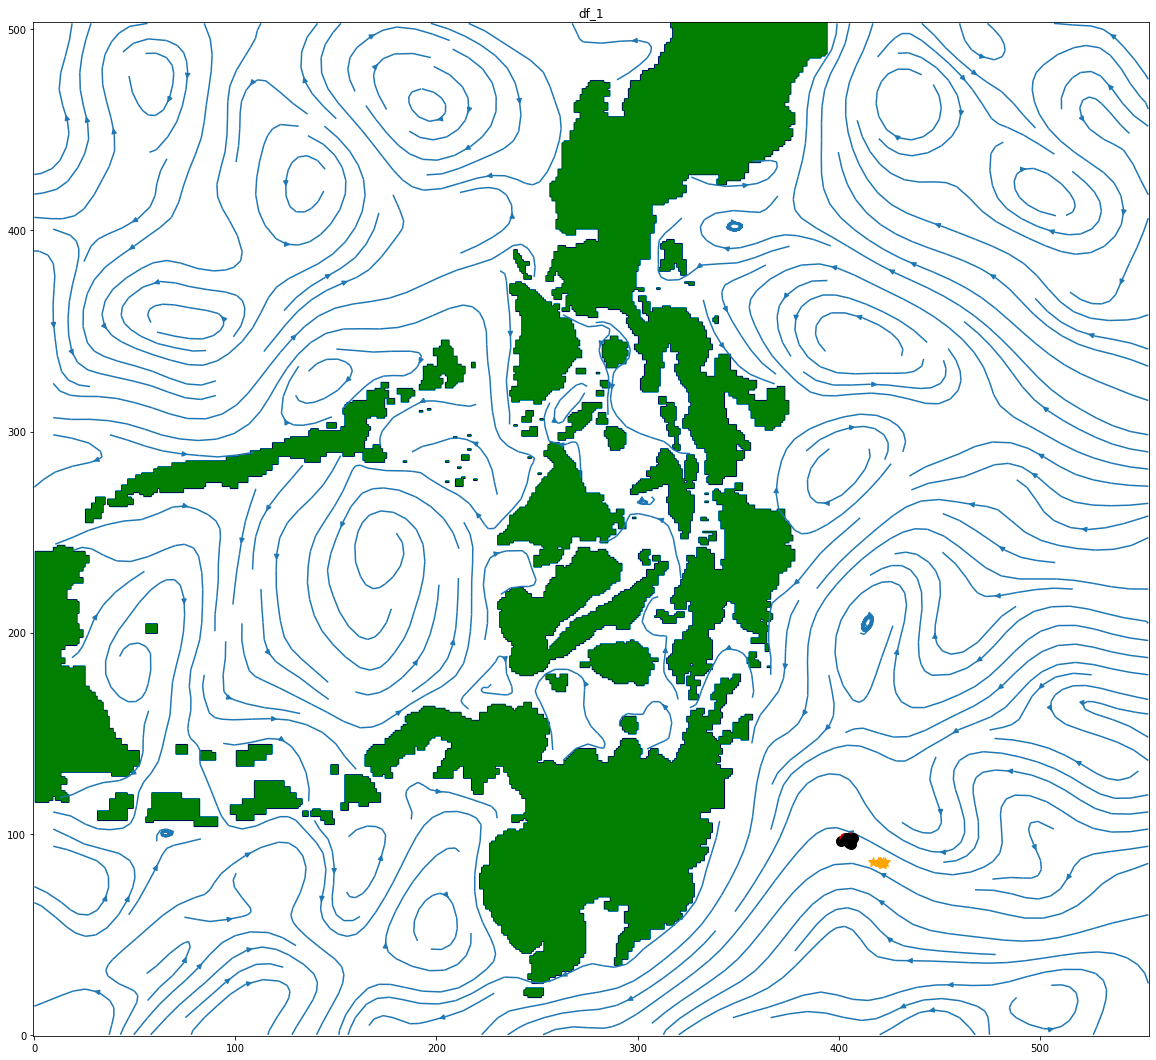

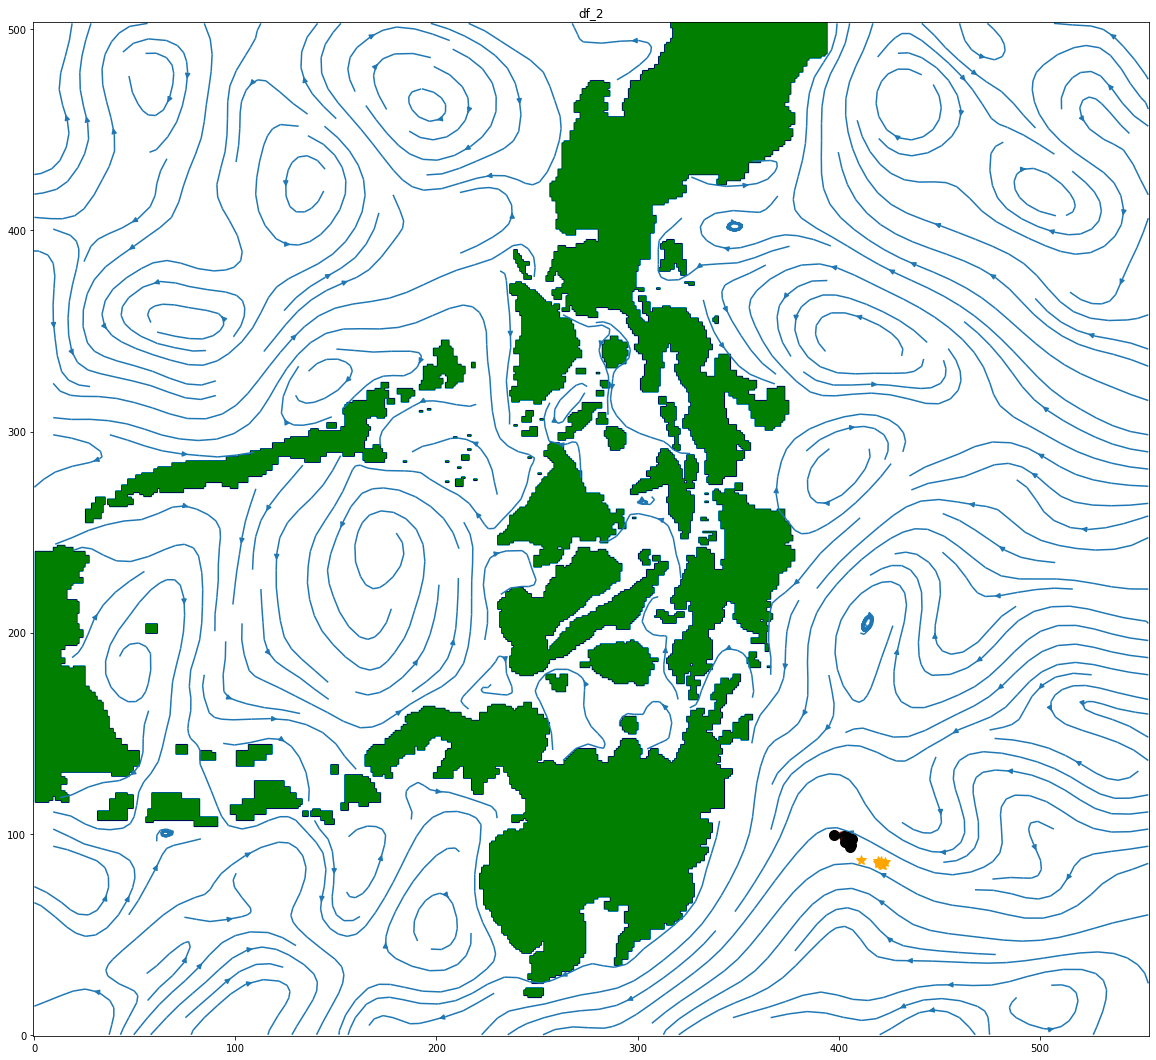

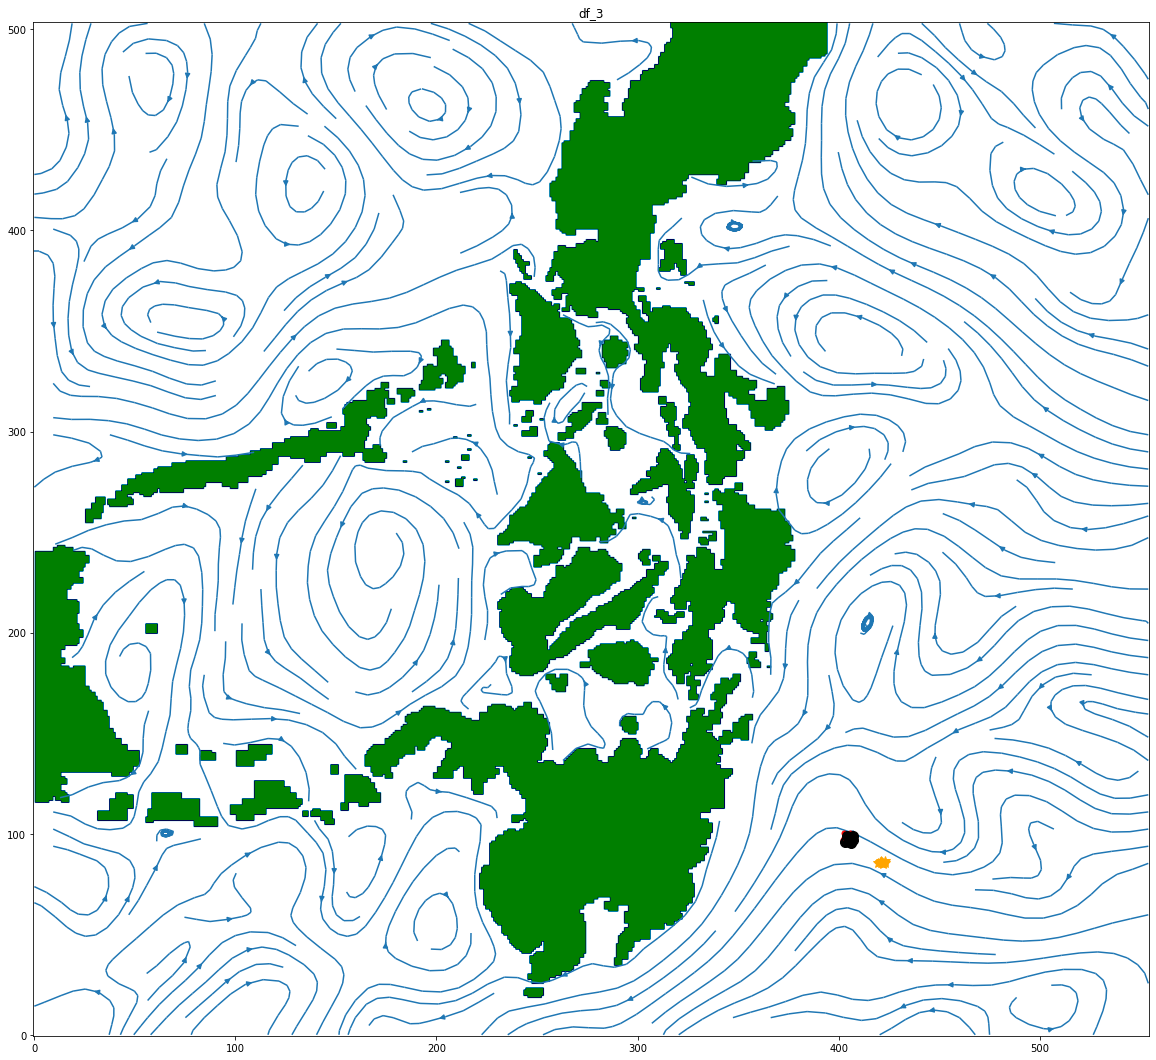

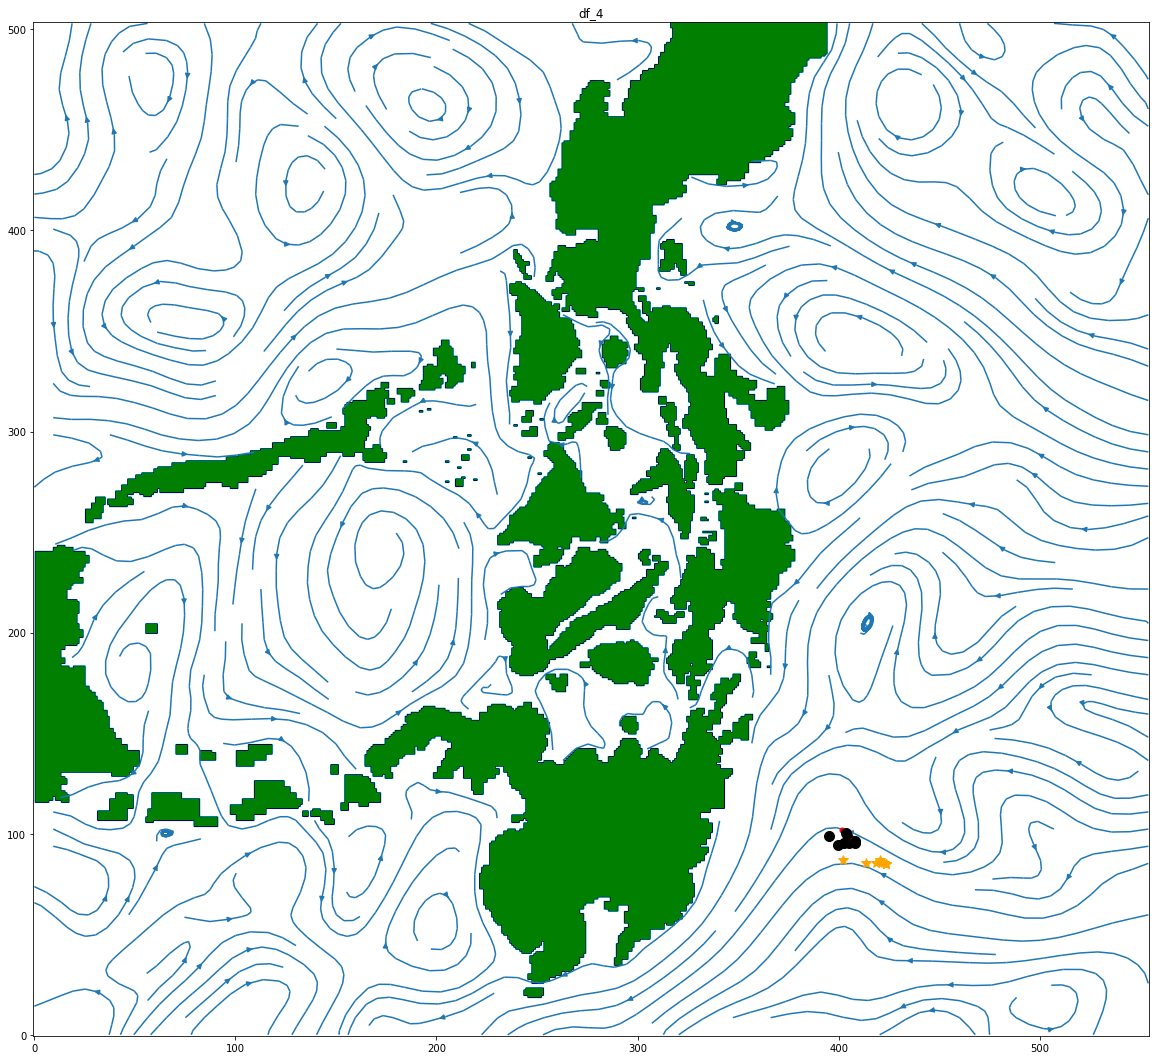

In [75]:
#Plot results of all paths over time plotted with mask of land

for key in dict_of_df.keys():
    fig1, ax1 = plt.subplots(figsize=(20, 20))
    ph = ax1.imshow(np.flip(mask,0), cmap ='ocean')
    #strm = ax1.streamplot(X,Y, np.flip(u, 0), np.flip(v, 0), density=1.8, linewidth=0.8, maxlength=0.5)

    S = ax1.streamplot(X, Y, Avg_u, Avg_v, density=2)
    ax1.invert_yaxis()
    #plt.xlim(60, 250)
    #plt.ylim(300, 400)
    plt.title(key)
    #Converting back to index
    df_1_nonkm = (dict_of_df[key].iloc[15,:])/3
    df_2_nonkm = (dict_of_df[key].iloc[23,:])/3
    df_3_nonkm = (dict_of_df[key].iloc[99,:])/3

    num = int((dict_of_df[key].shape[1])/2)
    for i in range(num):
        x_col = 'x pos'+str(i)
        y_col = 'y pos'+str(i)
        plt.plot(df_1_nonkm[x_col],df_1_nonkm[y_col], '.', color='red', label ='48 hours',ms=10)
        plt.plot(df_2_nonkm[x_col],df_2_nonkm[y_col], 'o', color='black',label ='72 hours',ms=10)
        plt.plot(df_3_nonkm[x_col],df_3_nonkm[y_col], '*', color='orange', label ='120 hours',ms=10)
        #plt.legend()


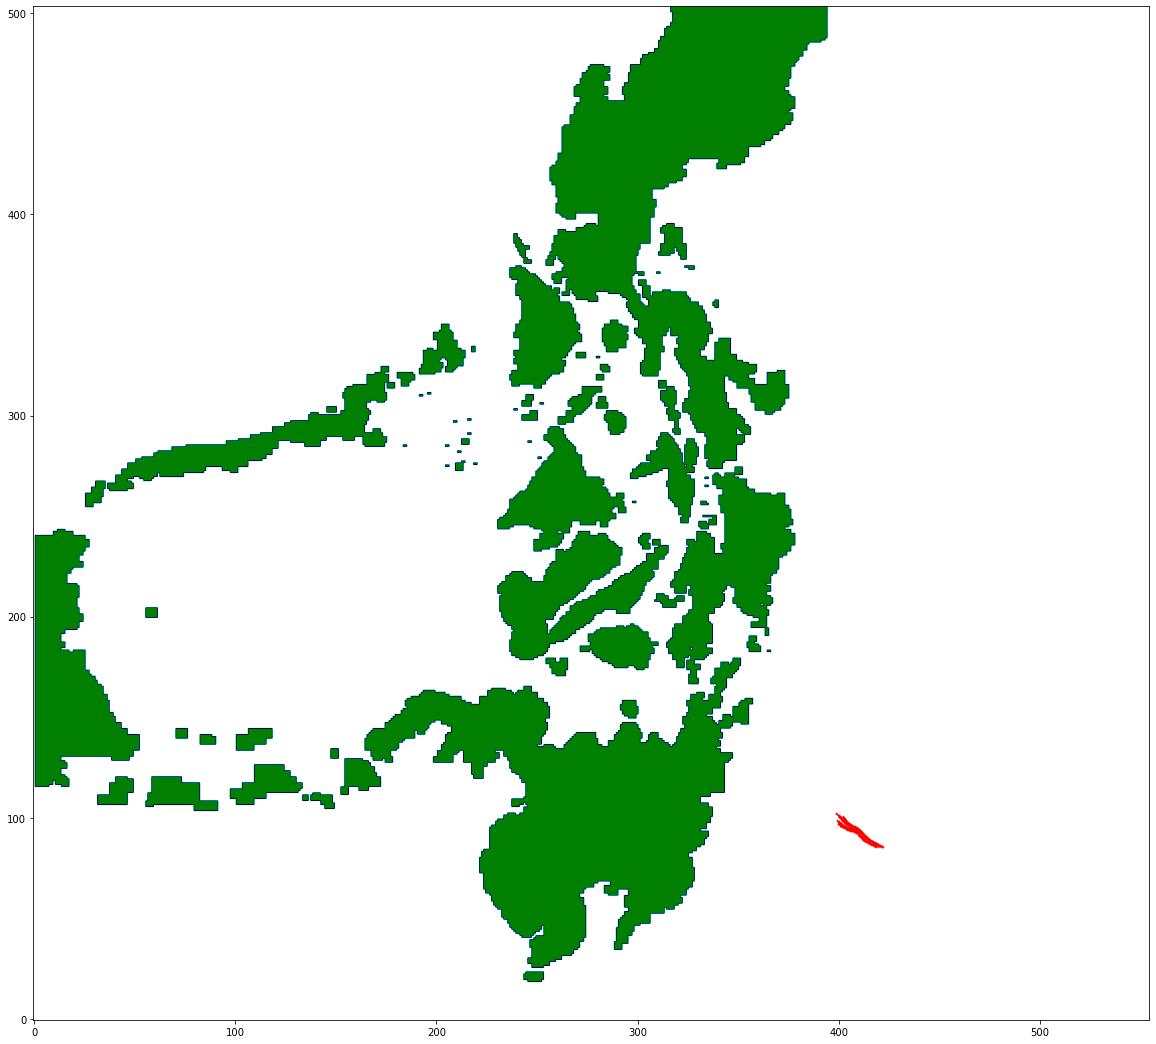

In [69]:
fig1, ax1 = plt.subplots(figsize=(20, 20))
ph = ax1.imshow(np.flip(mask,0), cmap ='ocean')
ax1.invert_yaxis()

#Converting back to index
df_1_nonkm = (df_name)/3
num = int((df_name.shape[1])/2)

for i in range(num):
    x_col = 'x pos'+str(i)
    y_col = 'y pos'+str(i)
    plt.plot(df_1_nonkm[x_col],df_1_nonkm[y_col], '.', color='red', ms=1)
        
        #plt.legend()

0
1
2
3
4
5
6
7
8
9


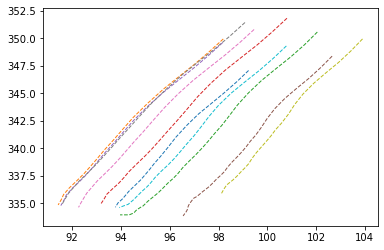

In [108]:
#Plot with out Mask
#Converting back to index
#gp_nonkm = gaussian_path/3
num = int(df_2.shape[1]/2)
for i in range(num):
    print(i)
    x_col = 'x pos'+str(i)
    y_col = 'y pos'+str(i)
    plt.plot(df_2_nonkm[x_col],df_2_nonkm[y_col], '--', label='line with marker', linewidth=1)
